In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score




# a function that returns each colum unique values, whit the amount of uniques
def info_dados(df):
    columns = df.columns
    for column in columns:
        print(f'Column: {column}')
        print(df[column].unique(), f'Shape: {df[column].unique().shape[0]}')
        
# a function that return lists with columns to bin, to make dummies and numerical values        
def columns_operations(df):
    columns_tobin = []
    columns_todummie = []
    columns_numerical = []
    columns = df.columns
    for column in columns:
        if df[column].unique().shape[0] < 3 and df[column].dtype == 'object':
            columns_tobin = np.append(columns_tobin,column)

        elif df[column].dtype == 'object':
            columns_todummie = np.append(columns_todummie,column)

        elif df[column].dtype != 'object':
            columns_numerical = np.append(columns_numerical,column)
    return columns_tobin, columns_todummie, columns_numerical

# a function that bins "sim" and "não", makes dummies and retur a complete dataframe
def dataframe_bin(df, drop_first = False):
    columns_tobin = []
    columns_todummie = []
    columns_numerical = []
    columns = df.columns
    for column in columns:
        if df[column].unique().shape[0] < 3 and df[column].dtype == 'object':
            columns_tobin = np.append(columns_tobin,column)

        elif df[column].dtype == 'object':
            columns_todummie = np.append(columns_todummie,column)

        elif df[column].dtype != 'object':
            columns_numerical = np.append(columns_numerical,column)
            
    lb = LabelBinarizer()
    df_bin = pd.DataFrame()
    for column in columns_tobin:
        df[column] = pd.DataFrame(pd.Series(np.where(df[column].values == 'Sim', 1, 0)))
    return df

def dataframe_bin_dummie(df, drop_first = False):
    columns_tobin = []
    columns_todummie = []
    columns_numerical = []
    columns = df.columns
    for column in columns:
        if df[column].unique().shape[0] < 3 and df[column].dtype == 'object':
            columns_tobin = np.append(columns_tobin,column)

        elif df[column].dtype == 'object':
            columns_todummie = np.append(columns_todummie,column)

        elif df[column].dtype != 'object':
            columns_numerical = np.append(columns_numerical,column)
            
    lb = LabelBinarizer()
    df_bin = pd.DataFrame()
    for column in columns_tobin:
        df_bin[column] = pd.DataFrame(pd.Series(np.where(df[column].values == 'Sim', 1, 0)))
    df_dummies = pd.get_dummies(df[columns_todummie],drop_first=drop_first)
    return pd.concat([df_dummies,df[columns_numerical],df_bin],axis=1)

def data_import_save(url =  "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv", 
                         savepath = '..\\src\\data\\churn_detection_raw.csv'):
    df_temp = pd.read_csv(url)
    df_temp.to_csv(savepath)
    return df_temp

In [2]:
df_raw = data_import_save()
df = dataframe_bin_dummie(df_raw,drop_first=True)
df

,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,...,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,29.85,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,34,56.95,0,0,1,0,0
2,0,0,0,0,0,1,0,1,0,0,...,1,0,0,2,53.85,0,0,1,1,1
3,1,0,0,0,0,1,0,0,0,1,...,0,1,0,45,42.30,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,70.70,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,1,0,0,0,1,...,1,0,0,24,84.80,1,1,1,1,0
7039,0,1,1,0,0,0,0,1,0,1,...,0,0,0,72,103.20,1,1,1,1,0
7040,1,0,0,0,0,1,0,0,0,0,...,0,0,0,11,29.60,1,1,0,1,0
7041,0,1,1,0,0,0,0,0,0,0,...,1,0,1,4,74.40,1,0,1,1,1


<AxesSubplot: xlabel='StreamingDeFilmes', ylabel='count'>

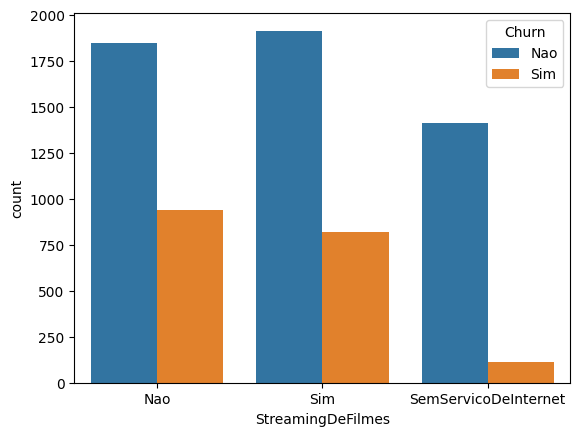

In [3]:
sns.countplot(x=df_raw[df_raw.columns[12]], hue='Churn', data=df_raw, )

<AxesSubplot: xlabel='Churn', ylabel='count'>

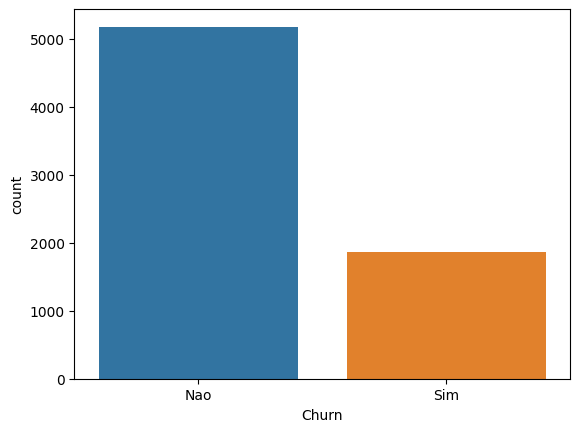

In [4]:
sns.countplot(x='Churn', data=df_raw)

<AxesSubplot: >

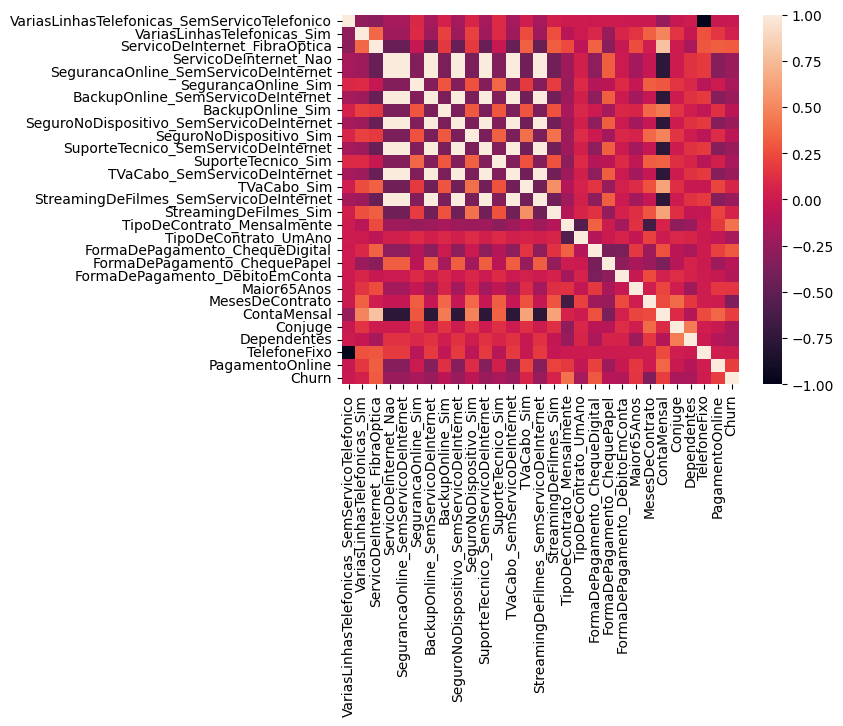

In [5]:
sns.heatmap(df.corr(),xticklabels=1, yticklabels=1)

In [52]:
y = df.Churn
X = df.drop('Churn', axis=1)

In [26]:
smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)  
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## KNN

In [53]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8093704245973645

In [55]:
print(confusion_matrix(y_test,knn.predict(X_test)))


[[1348  382]
 [ 269 1416]]


# Naive Bayes


In [56]:
from sklearn.naive_bayes import BernoulliNB

In [57]:
bnb = BernoulliNB(binarize=np.mean(X_train))
bnb.fit(X_train,y_train)
bnb.score(X_test,y_test)


0.7879941434846266

In [58]:
print(confusion_matrix(y_test,bnb.predict(X_test)))


[[1240  490]
 [ 234 1451]]


# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [61]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [62]:
tree.score(X_test,y_test)

0.7669106881405564

In [66]:
a = pd.DataFrame([df.drop('Churn', axis=1).columns.tolist(),tree.feature_importances_.tolist()])
a = a.transpose()
a.sort_values(by = 1,ascending=False).head(5)

,0,1
16,TipoDeContrato_Mensalmente,0.507399
22,MesesDeContrato,0.189806
2,ServicoDeInternet_FibraOptica,0.094572
5,SegurancaOnline_Sim,0.082763
6,BackupOnline_SemServicoDeInternet,0.064861


In [39]:
print(confusion_matrix(y_test,tree.predict(X_test)))

[[1232  498]
 [ 298 1387]]


# Comparação entre os modelos

Como o 

In [40]:


print('A acurácia do KNN é:',accuracy_score(y_test,knn.predict(X_test)))
print('A acurácia do Naive Bayes é:',accuracy_score(y_test,bnb.predict(X_test)))
print('A acurácia do Árvore de Decisão é:',accuracy_score(y_test,tree.predict(X_test)))

A acurácia do KNN é: 0.8093704245973645
A acurácia do Naive Bayes é: 0.7879941434846266
A acurácia do Árvore de Decisão é: 0.7669106881405564


In [45]:
print('A precisão do KNN é:',precision_score(y_test,knn.predict(X_test)))
print('A precisão do Naive Bayes é:',precision_score(y_test,bnb.predict(X_test)))
print('A precisão do Árvore de Decisão é:',precision_score(y_test,tree.predict(X_test)))

A precisão do KNN é: 0.7875417130144605
A precisão do Naive Bayes é: 0.747552807831015
A precisão do Árvore de Decisão é: 0.7358090185676393


In [42]:
print('O recall do KNN é:',recall_score(y_test,knn.predict(X_test)))
print('O recall do Naive Bayes é:',recall_score(y_test,bnb.predict(X_test)))
print('O recall do Árvore de Decisão é:',recall_score(y_test,tree.predict(X_test)))

A acurácia do KNN é: 0.8403560830860534
A acurácia do Naive Bayes é: 0.8611275964391691
A acurácia do Árvore de Decisão é: 0.8231454005934719


In [43]:
print('O score F1 do KNN é:',f1_score(y_test,knn.predict(X_test)))
print('O score F1 do Naive Bayes é:',f1_score(y_test,bnb.predict(X_test)))
print('O score F1 do Árvore de Decisão é:',f1_score(y_test,tree.predict(X_test)))

A acurácia do KNN é: 0.8130921619293712
A acurácia do Naive Bayes é: 0.8003309431880861
A acurácia do Árvore de Decisão é: 0.7770308123249301


In [44]:
print('O score AUC ROC do KNN é:',roc_auc_score(y_test,knn.predict(X_test)))
print('O score AUC ROC do Naive Bayes é:',roc_auc_score(y_test,bnb.predict(X_test)))
print('O score AUC ROC do Árvore de Decisão é:',roc_auc_score(y_test,tree.predict(X_test)))

O score AUC ROC do KNN é: 0.80977341726557
O score AUC ROC do Naive Bayes é: 0.7889453011097579
O score AUC ROC do Árvore de Decisão é: 0.7676420644585856
